# Visualizations

This Notebook defines the functions used to make the various plots for the tumor population and its clones described by `MyModel.py`.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from ThesisScripts.MyModel import Population, Clone

import matplotlib.pyplot as plt
%matplotlib inline

#matplotlib preamble, taken from http://blog.juliusschulz.de/blog/ultimate-ipython-notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

## Reference simulation

In [3]:
# Test cell: Reference population

# set seed to get same result for each test simulation
np.random.seed(123)

l = 10**6
q = 10**(-3)
testRef = Population(l, q, mutfactor=1.2, death_frac=0.3)
testRef.simulate()
print("testRefotal population size:", testRef.size)
print("Generations:", testRef.gen)
print()
print("Start clone size:", testRef.start_clone.size)
print("Total number of mutations:", sum(testRef.mut_vec))
print("Number of subclones:", len(testRef.clones[1:]))
print("testRefotal size of subclones:", sum([x.size for x in testRef.clones[1:]]))
print("Dead clones:", len([x for x in testRef.clones if x.size == 0]))
print()

Simulation completed succesfully

testRefotal population size: 1501293
Generations: 26

Start clone size: 1489091
Total number of mutations: 2191
Number of subclones: 2191
testRefotal size of subclones: 12202
Dead clones: 186



## Individual clone size plots

In [8]:
def size_plots(population, det_lim=0):
    '''Plots total population size and all individual clone sizes'''
    
    fig = plt.figure(figsize=(14, 14))
    
    # First subplot: total population size and start-clone individual size
    ax1 = plt.subplot(211)
    ax1.plot(population.size_vec, marker='*', label="Total Population")
    start_hex_rgb = '#%02X%02X%02X' %(population.start_clone.rgb_color)  # get start-clone color
    start_lab = "Clone %s" %population.start_clone.ID                    # create label for start clone
    ax1.plot(population.start_clone.size_vec, marker='.', color=start_hex_rgb, label=start_lab)
    ax1.set_ylabel("Cell count")
    ax1.set_yscale('log')
    ax1.set_title('Total population and start clone')
    ax1.legend()
    ax1.set_xticks(range(0, population.gen+1, 1))
        
    # Second sublot: plot subclones sizes
    clones = population.clones[1:]   # excluding start-clone
    if det_lim > 0:
        clones = list(filter(lambda subclone: subclone.get_family_size() >= det_lim, clones))
        
    ax2 = plt.subplot(212)
    
    for clone in clones:
        hex_rgb_col = '#%02X%02X%02X' %(clone.rgb_color)  # convert RGB color to hex format to be used in plot
        lab = "Clone %s" %clone.ID
        ax2.plot(clone.size_vec, marker='.', color=hex_rgb_col, label=lab)
        
    ax2.set_xlabel("Generation")
    ax2.set_ylabel("Cell count")
    ax2.set_yscale('log')
    ax2.set_title('Subclones')
    ax2.set_xticks(range(0, population.gen+1, 1))    
    
    return fig

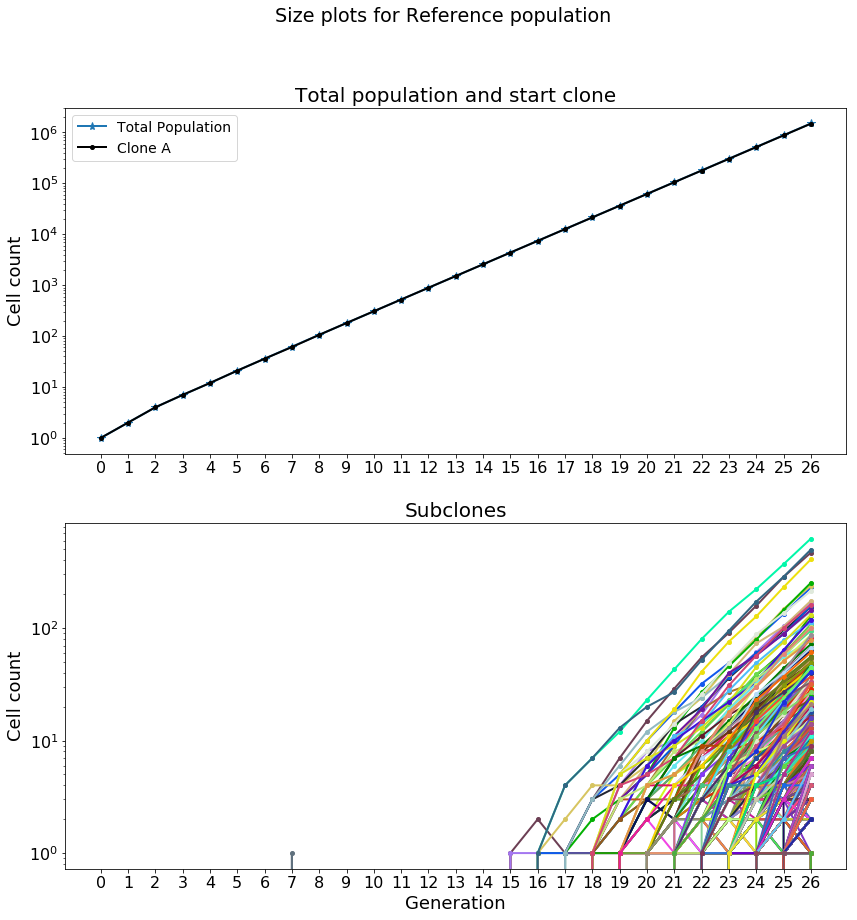

In [15]:
# test
size_plot = size_plots(testRef, det_lim=0)
plt.suptitle("Size plots for Reference population")
#plt.legend()
plt.show()

## Clone family size plots

In [4]:
def family_size_plots(population, det_lim=0):
    '''Creates plots of the clone family sizes per generation'''
    
    clones = population.clones[1:]   # don't take start clone into account (has same plot as total population)
    
    if det_lim > 0:
        clones = list(filter(lambda subclone: subclone.get_family_size() >= det_lim, clones))
    
    fig = plt.figure()
    
    for clone in clones:
        family_size_vec = clone.get_family_size_vec()
        hex_rgb_col = '#%02X%02X%02X' %(clone.rgb_color)  # convert clone RGB color to hex format
        lab = "Clone %s" %clone.ID                        # create label from clone ID
        plt.plot(family_size_vec, marker='.', color=hex_rgb_col, label=lab)
        
    plt.xlabel("Generation")
    plt.ylabel("Family size")
    plt.yscale('log')
    plt.xticks(range(0, population.gen+1, 1))
    
    return fig

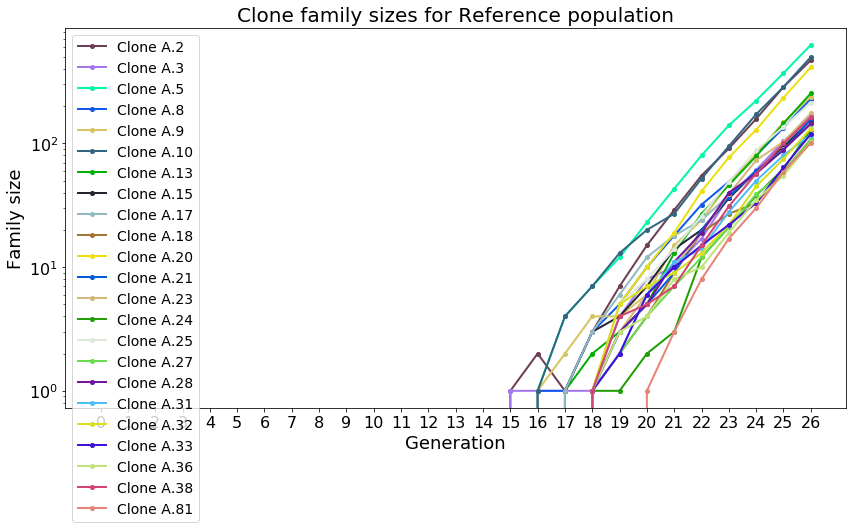

In [7]:
# test family_size_plots
fam_size_plot = family_size_plots(testRef, det_lim=100)
plt.title("Clone family sizes for Reference population")
plt.legend()
plt.show()

## Mutations per generation barplot

In [6]:
def mutations_barplot(population, log=False):
    '''makes barplot of number of mutations in each generation'''
    plt.figure()
    plt.bar(range(population.gen+1), population.mut_vec, color='k')
    plt.title('Number of mutations per generation')
    plt.ylabel('# mutations occurred')
    plt.xlabel('Generation')
    if log == True:
        plt.yscale('log')
    plt.xticks(np.arange(0, population.gen+1, 1))
    plt.show()

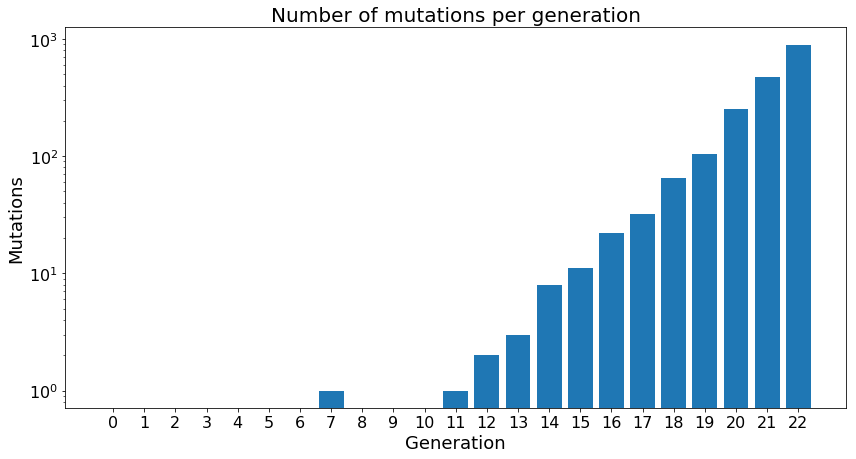

In [5]:
mutations_barplot(testRef, log=True)